My FinalYear project is going to be based on a trading strategy. I will be using the pair NIKKEI-VIX and from there I will be developing a mean reversion strategy using forecasting methods and a natural language processing model.

First thing I will do is retrive the data and understand it as well as manipulate it.

In [3]:
#Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [4]:
 Vix = pd.DataFrame(yf.download('^VIX', start = '2023-1-1', end = '2025-3-20', interval = '1d'))
 nikkie = pd.DataFrame(yf.download('NKD=F', start = '2023-1-1', end = '2025-3-20', interval = '1d'))


 #Now I am going to study only the adjusted close, that is the data we are going to use for the model

 VixValues = Vix.Close
 NikkeiValues = nikkie.Close

 print(VixValues.describe())
 print(NikkeiValues.describe())

 #Now I check for any null values inside the data

 print(VixValues.isnull().sum())
 print(NikkeiValues.isnull().sum())

 #After seeing that there are no null values we know that the value the data is complete.
#Lastly we are going to check the shape to check if it matches

 print(VixValues.shape)
 print(NikkeiValues.shape)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker        ^VIX
count   554.000000
mean     16.450433
std       3.380171
min      11.860000
25%      13.742500
50%      15.825000
75%      18.617501
max      38.570000
Ticker         NKD=F
count     556.000000
mean    34924.370504
std      4331.383282
min     25710.000000
25%     32005.000000
50%     36155.000000
75%     38755.000000
max     42510.000000
Ticker
^VIX    0
dtype: int64
Ticker
NKD=F    0
dtype: int64
(554, 1)
(556, 1)


In this step I visualize the data for a better understanding

In [5]:
#Here I am obteining the returns of the price in a 1 day period over 2 years
#And its volatility over the two years of each month to check for similarities

VixReturns = VixValues / VixValues.shift(1)
VixReturns = VixReturns.dropna()

VixVolatility = VixValues.pct_change().rolling(window = 21).std()
VixVolatility = VixVolatility.dropna()



NikkeiReturns = NikkeiValues / NikkeiValues.shift(1)
NikkeiReturns = NikkeiReturns.dropna()

NikkeiVolatility = NikkeiValues.pct_change().rolling(window = 21).std()
NikkeiVolatility = NikkeiVolatility.dropna()

#Here I will print the values for the returns and volatility as well as checking for null values

print(VixReturns,NikkeiReturns)
print(VixVolatility, NikkeiVolatility)

Ticker          ^VIX
Date                
2023-01-04  0.961135
2023-01-05  1.020445
2023-01-06  0.940784
2023-01-09  1.039754
2023-01-10  0.936732
...              ...
2025-03-13  1.017747
2025-03-14  0.882806
2025-03-17  0.942122
2025-03-18  1.058021
2025-03-19  0.917051

[553 rows x 1 columns] Ticker         NKD=F
Date                
2023-01-04  1.001743
2023-01-05  0.994200
2023-01-06  1.018864
2023-01-09  1.001145
2023-01-10  1.002288
...              ...
2025-03-13  0.989355
2025-03-14  1.020567
2025-03-17  1.008942
2025-03-18  0.996032
2025-03-19  1.001859

[555 rows x 1 columns]
Ticker          ^VIX
Date                
2023-02-02  0.047810
2023-02-03  0.047403
2023-02-06  0.049321
2023-02-07  0.048435
2023-02-08  0.049067
...              ...
2025-03-13  0.083656
2025-03-14  0.088962
2025-03-17  0.089294
2025-03-18  0.089197
2025-03-19  0.091968

[533 rows x 1 columns] Ticker         NKD=F
Date                
2023-02-02  0.009593
2023-02-03  0.009588
2023-02-06  0.009368
2023

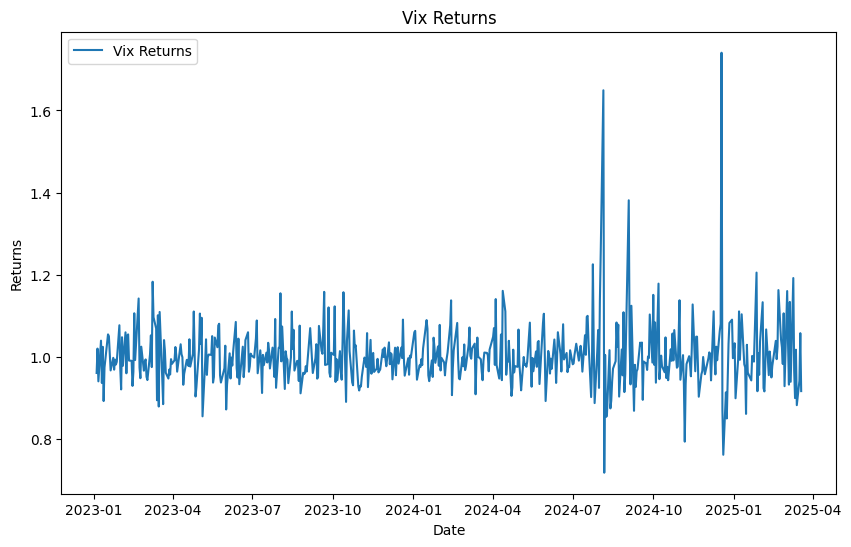

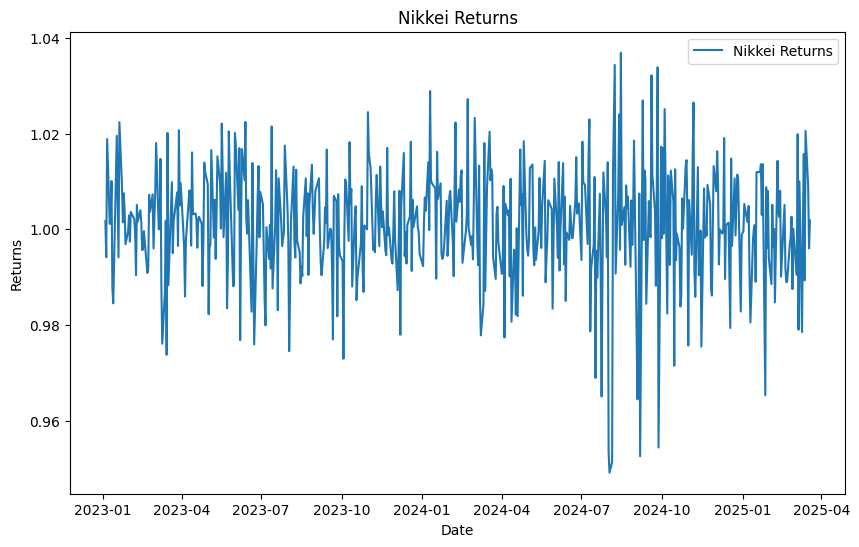

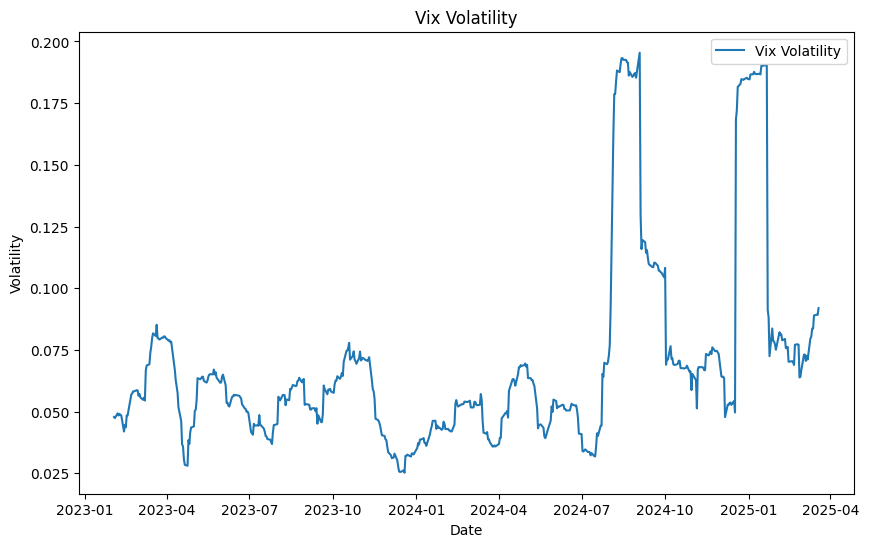

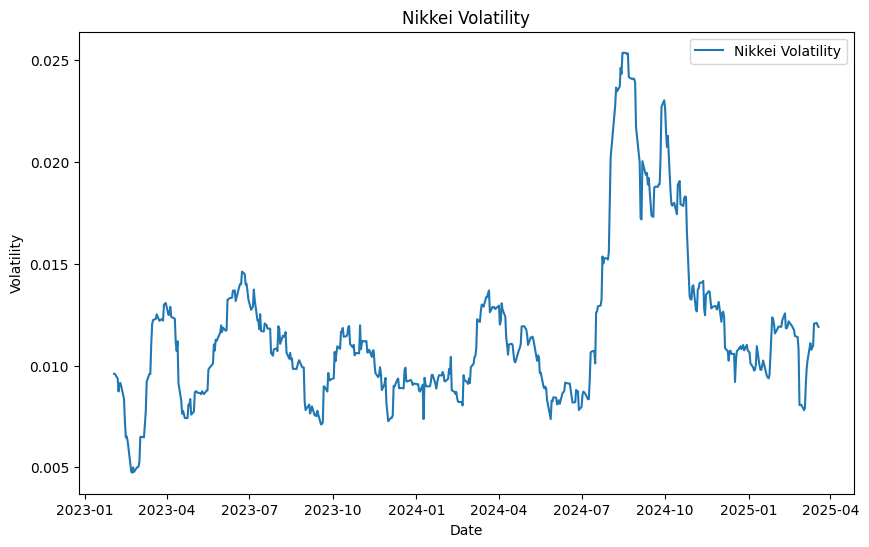

In [6]:
#After calculating the returns and the volatility I decide to plot it to visualize it.

plt.figure(figsize = (10,6))
plt.plot(VixReturns, label = 'Vix Returns')
plt.title('Vix Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()



plt.figure(figsize = (10,6))
plt.plot(NikkeiReturns, label = 'Nikkei Returns')
plt.title('Nikkei Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.figure(figsize = (10,6))
plt.plot(VixVolatility, label = 'Vix Volatility')
plt.title('Vix Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

plt.figure(figsize = (10,6))
plt.plot(NikkeiVolatility, label = 'Nikkei Volatility')
plt.title('Nikkei Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()


plt.show()

After seeing that there are some similiarities in the times where the volume and returns spike, I will check for its corralation and conitegration between both

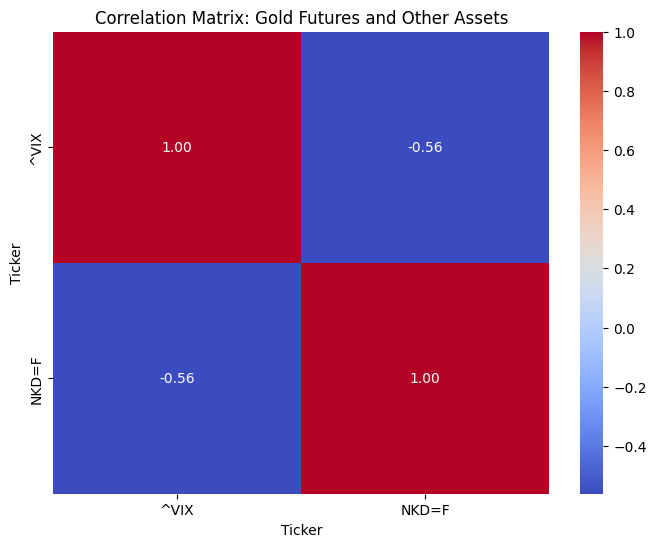

Cointegration Test Statistic: -13.958114146619986
P-value: 4.313581763405162e-25
Critical Values: [-3.91639043 -3.34722141 -3.05214226]


In [7]:
#Checking for corralation between both, first I will had the returns to the same dataframe

Returns = pd.DataFrame(VixReturns, index = VixReturns.index)
Returns['NKD=F'] = NikkeiReturns
Returns.head()

#Creating the corralation matrix

corralation_matrix = Returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corralation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Gold Futures and Other Assets")
plt.show()

# To check for cointegration we need to do the Engle-Granager test.

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

#Here I perform the test

coint_t,p_value,critical_values = coint(Returns['^VIX'], Returns['NKD=F'])

print(f"Cointegration Test Statistic: {coint_t}")
print(f"P-value: {p_value}")
print(f"Critical Values: {critical_values}")

After runing the corralation and cointegration we can see that they are both corralated and cointegrated at the same time.

 To check for the corralation we just need to see at the matrix, as we can see we get values of -0.56 meaning that they both have a negative corralation

 In terms of the cointegration we need to check for the p_value of the Engle-Granger test. As we can see we fail to reject the null hypothesis and we can say that both have a long-term relationship, meaning they are cointegrated.



The last thing of visualization to do is to plot both of them with their price scaled and see if there are some movements relevant for mean-reversion.

In [8]:
#This library is the one needed to scale values
!pip install scikit-learn

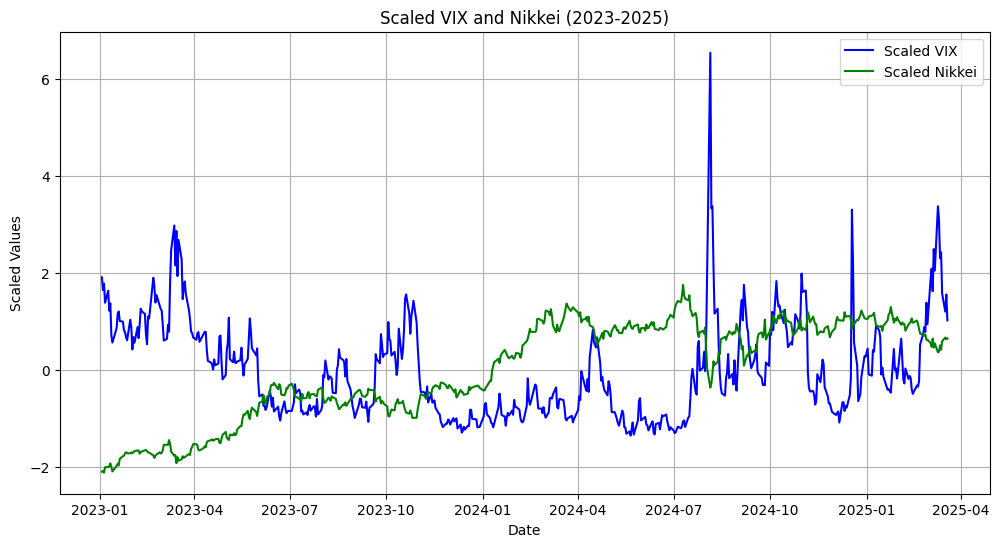

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


Prices = pd.DataFrame(VixValues, index = VixValues.index)
Prices['NKD=F'] = NikkeiValues

#Here I are scaling the data using a standard scaler
scaled_prices = scaler.fit_transform(Prices)
scaled_prices = pd.DataFrame(scaled_prices, columns = Prices.columns, index = Prices.index)


plt.figure(figsize=(12, 6))
plt.plot(scaled_prices['^VIX'], label='Scaled VIX', color='blue')
plt.plot(scaled_prices['NKD=F'], label='Scaled Nikkei', color='green')
plt.title('Scaled VIX and Nikkei (2023-2025)')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()




In the plot we can identify some patterns relevant to a mean-reversion strategy. This confirms my deseire to proceed with these pairs.



The next step is retrieving sentimental data, this is the data we are going to use in our natural language processing model where it will give it a score depending on its importance. With this idea we manage to model market sentiment and take it into account for our model.

In [10]:
#This library is needed for the process
!pip install requests pandas transforms

In [11]:
#Here I am going to retrive the data from a Free API key.

import requests

API_KEY = "040662afeb88429db4f702eae6a96455" #This key dosnt offer real time data, only from the previous day.
QUERY = "VIX OR United States stock market" # This is tells the api to look for titles containing those key words.
URL = f"https://newsapi.org/v2/everything?q={QUERY}&language=en&sortBy=publishedAt&apiKey={API_KEY}"

#Retrieving the news
response = requests.get(URL)
data = response.json()

#Here I extract the relevant information, create a dataframe and visualize it
articles = data["articles"]
news_data = [{"date": article["publishedAt"], "title": article["title"], "content": article["description"]} for article in articles]


News = pd.DataFrame(news_data)
print(News.tail())


print(News.shape)


                    date                                              title  \
95  2025-05-04T07:25:16Z  Wells Fargo & Company MN Increases Stake in Bl...   
96  2025-05-04T07:25:10Z  Wells Fargo & Company MN Has $460,000 Holdings...   
97  2025-05-04T07:25:09Z  Oppenheimer Cuts XPO (NYSE:XPO) Price Target t...   
98  2025-05-04T07:25:07Z  CareTrust REIT (NASDAQ:CTRE) Shares Gap Down –...   
99  2025-05-04T07:25:07Z  United States Cellular (NYSE:USM) Shares Gap D...   

                                              content  
95  Wells Fargo & Company MN grew its holdings in ...  
96  Wells Fargo & Company MN boosted its position ...  
97  XPO (NYSE:XPO – Free Report) had its price obj...  
98  CareTrust REIT, Inc. (NASDAQ:CTRE – Get Free R...  
99  United States Cellular Co. (NYSE:USM – Get Fre...  
(100, 3)


As we can see we get data only from the last day,this does limit our model but we can still use this data to understand how our model would work with real time data and backtest it.


Now after retrieving news data and understanding it, we are going to give it a score value. This will then be used in our models. I will achive this by using FinBERT a deep learning model focused in natural language processing.

In [12]:
# I retrive the function needed
from transformers import pipeline

# I just create the pipeline using FinBert
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

#And hgere I append the values of the score and sentiment to the dataframe
News["sentiment"] = News["title"].apply(lambda x: sentiment_pipeline(x)[0]['label'])
News["sentiment_score"] = News["title"].apply(lambda x: sentiment_pipeline(x)[0]['score'])

News

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,date,title,content,sentiment,sentiment_score
0,2025-05-04T07:46:59Z,"Barclays PLC Acquires 12,483 Shares of Amplitu...",Barclays PLC raised its stake in shares of Amp...,neutral,0.936081
1,2025-05-04T07:46:58Z,Barclays PLC Has $1.52 Million Position in Sta...,Barclays PLC grew its stake in Standard Motor ...,neutral,0.947451
2,2025-05-04T07:46:57Z,Barclays PLC Increases Stock Position in Unite...,Barclays PLC boosted its holdings in United St...,positive,0.879529
3,2025-05-04T07:46:53Z,Clean Harbors (NYSE:CLH) Upgraded at StockNews...,StockNews.com upgraded shares of Clean Harbors...,neutral,0.926138
4,2025-05-04T07:46:51Z,Paymentus (NYSE:PAY) Upgraded at StockNews.com,StockNews.com upgraded shares of Paymentus (NY...,neutral,0.940262
...,...,...,...,...,...
95,2025-05-04T07:25:16Z,Wells Fargo & Company MN Increases Stake in Bl...,Wells Fargo & Company MN grew its holdings in ...,neutral,0.725769
96,2025-05-04T07:25:10Z,"Wells Fargo & Company MN Has $460,000 Holdings...",Wells Fargo & Company MN boosted its position ...,neutral,0.951371
97,2025-05-04T07:25:09Z,Oppenheimer Cuts XPO (NYSE:XPO) Price Target t...,XPO (NYSE:XPO – Free Report) had its price obj...,neutral,0.519785
98,2025-05-04T07:25:07Z,CareTrust REIT (NASDAQ:CTRE) Shares Gap Down –...,"CareTrust REIT, Inc. (NASDAQ:CTRE – Get Free R...",negative,0.593351


As shown in the data frame abouve, we can identify the two new columns.

Sentiment: Meaning what the sentiment of the news is for the asset, in my case the VIX



Sentimnet score : This value indicates the confidence the model has for its prediction


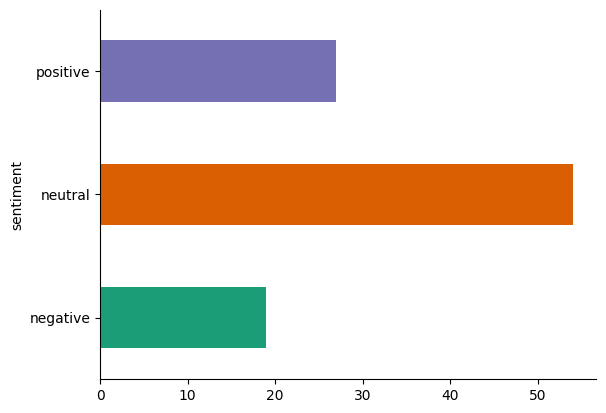

In [13]:
#Here I create a visualization to see the distribution of the sentiment values
from matplotlib import pyplot as plt
import seaborn as sns
News.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The distribution shown is skewed to neutral sentiment. This is something realistic as a lot of the news is not relevant for the VIX

In this stage, after retreaving all the data needed, making sure its aligned and that it has the necessary values. I can begin craeting the mean-reversion algorithm.

For this I decided to shrink the data range, backtesting the model only from 2025-2-5 till 2025-3-20 on an hourly frame. This dates where chosen as the market suffered strong volatilty movements due to US news.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker                         ^VIX     NKD=F
Datetime                                     
2025-02-05 08:00:00+00:00 -0.530140  0.796777
2025-02-05 09:00:00+00:00 -0.496845  0.729485
2025-02-05 10:00:00+00:00 -0.537824  0.779954
2025-02-05 11:00:00+00:00 -0.558313  0.841639
2025-02-05 12:00:00+00:00 -0.589047  0.869678


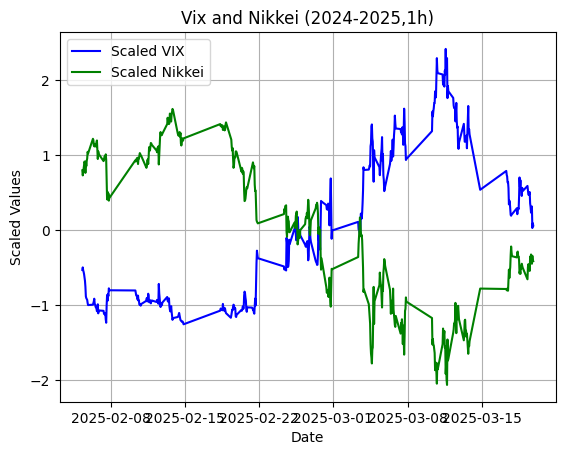

In [14]:
#Retrieving data from a smaller time frame
#This is done because I dont whant it to take into account events that happened in the past
vixTrade = pd.DataFrame(yf.download('^VIX', start = '2025-2-5', end = '2025-3-20', interval = '1h'))
nikkieTrade = pd.DataFrame(yf.download('NKD=F', start = '2025-2-5', end = '2025-3-20', interval = '1h'))

vixTradeValues = vixTrade.Close
nikkieTradeValues = nikkieTrade.Close

#Scaling the values to create the sequence

TradedValues = pd.DataFrame(vixTradeValues, index = vixTradeValues.index)
TradedValues['NKD=F'] = nikkieTradeValues
TradedValues = TradedValues.dropna()


Scaled_TradedValues = scaler.fit_transform(TradedValues)
Scaled_TradedValues = pd.DataFrame(Scaled_TradedValues, columns = TradedValues.columns, index = TradedValues.index)

print(Scaled_TradedValues.head())


#Now I plot it just to viualize its movement in a shorter timeframe

plt.plot(Scaled_TradedValues['^VIX'], label='Scaled VIX', color='blue')
plt.plot(Scaled_TradedValues['NKD=F'], label='Scaled Nikkei', color='green')
plt.title('Vix and Nikkei (2024-2025,1h)')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()





Now I will define the spread, for this I need to make sure its a fair value and this is done to make sure that the relationships between the two assets is adjusted. To achived this I used an OLS model.

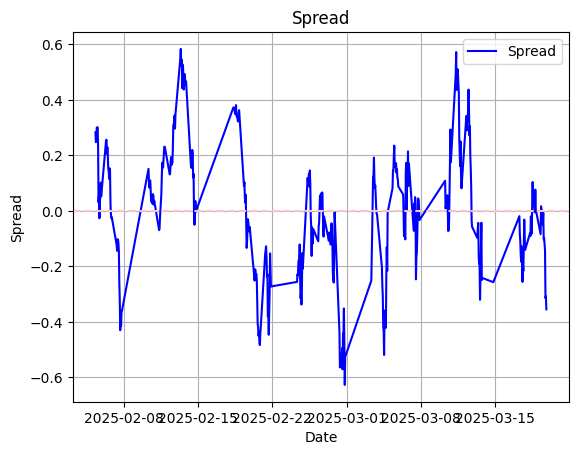

In [15]:

import statsmodels.api as sm

#Adding the intercet for the vix and the creation of the OLS

x = sm.add_constant(Scaled_TradedValues['^VIX'])
y= Scaled_TradedValues['NKD=F']

#Now I fit the model

model = sm.OLS(y,x).fit()

#I get the coeficinets

alpha, beta = model.params

model.summary()


#I store the values of the fair value of the nikkei

Scaled_TradedValues['FairValues_NKD=F'] = alpha + beta * Scaled_TradedValues['^VIX']


#Lastly I calculate the fair spread
spread = Scaled_TradedValues['NKD=F'] - Scaled_TradedValues['FairValues_NKD=F']

mean_spread = spread.mean()

plt.plot(spread, label='Spread', color='blue')
plt.title('Spread')
plt.axhline(y=mean_spread, color='pink', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

The plot above shows the spreads movement over the preido of the backtest. You can identify strong mean-reverting behaviours, indicating opportunities for my mean-reverting model.


After calculating the spread I will first check if its stationary,
this is one of the most important topics for mean-reversion strategies

In [16]:
from statsmodels.tsa.stattools import adfuller

#This is the Adam fuller test, this helps us understand if the data is stationary or not, this is a very key point of the mean-reversion strategy.
adf_test = adfuller(spread)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


ADF Statistic: -2.7529286444827443
p-value: 0.06531850014504728


After doing the adfuller test we can see that it fails to reject the null hypothesis but due to the risk of differencing and because it only rejects it by a little I will stick with this sread. In cases where the spread is storgly non-stationary differencing needs to be applied to make it stationary but this  eliminates some long-term relationships and adds unnecesary noise, something crucial for my model. Afer this, I am going to define the upper and lower bands for the trading model, these are just the base from where the sentiment analysis will adjust the thresholds.



                             Spread
Datetime                           
2025-03-19 16:00:00+00:00 -0.120599
2025-03-19 17:00:00+00:00 -0.142458
2025-03-19 18:00:00+00:00 -0.314226
2025-03-19 19:00:00+00:00 -0.308179
2025-03-19 20:00:00+00:00 -0.354822
(405,)


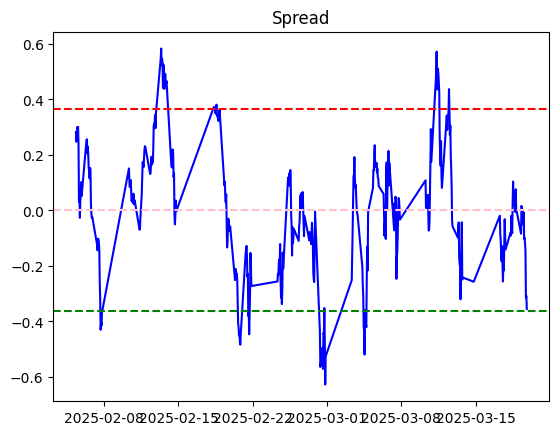

In [17]:
#Creating the data base for the spread

df_spread = pd.DataFrame(spread, index = Scaled_TradedValues.index, columns = ['Spread'])
df_spread.index = pd.to_datetime(df_spread.index)
df_spread.set_index(df_spread.index,inplace = True)
print(df_spread.tail())
print(spread.shape)
#Now I am going to define the upper and lower bands of the strategy

upperbound = spread.mean() + 1.5 * spread.std()
lowerbound = spread.mean() - 1.5 * spread.std()

plt.plot(spread, label='Spread', color='blue')
plt.title('Spread')
plt.axhline(y=mean_spread, color='pink', linestyle='--')
plt.axhline(y=upperbound, color='red', linestyle='--')
plt.axhline(y=lowerbound, color='green', linestyle='--')

As we can see in the plot, the spread does actually touch the barriers and then revert to the mean. What we are goign to do know is use the ARIMA model as a confirmation of the reversion of the spread.

 I decided to use an ARMIA model, knowing that the spread is stationary and univariate. I will follow the idea proposed, I will predict the next value of the spread after it touches one of the barriers.

Next step is to create a funcion that we will call when the price of the spread crosses one of the barriers and implement the ARIMA model

In [18]:
!pip install statsmodels



In [19]:
from statsmodels.tsa.arima.model import ARIMA



#This function is used to test different parameters of the ARIMA values.


#Here I define the function
def arima_prediction(spread_data):

    model = ARIMA(spread_data, order=(2,0, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    print(model_fit.summary())
    return forecast

print(arima_prediction(spread))


#After comparing different resutls I choose (2,0,2) as the values for the ARIMA model, the results can be seen below

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  405
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 413.621
Date:                Mon, 05 May 2025   AIC                           -815.242
Time:                        07:49:04   BIC                           -791.219
Sample:                             0   HQIC                          -805.733
                                - 405                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.059     -0.046      0.963      -0.117       0.112
ar.L1          1.6705      0.275      6.082      0.000       1.132       2.209
ar.L2         -0.6964      0.255     -2.726      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The selection of the parameters 2,0,2 shows promise for its implementation with the spread.

Now I am going to create the trading strategy.


---

Firstly I need to account for the news data only being from a previous day. What I decided to do was to use every news data point as an individual date, matching the data range from the spread. This way each day of the spread I can use a new news article matching that date to dinamically adjust the barriers. This is a solution to the challenge of having a Free API. In real time scenarions, real-time data would be used to adjust the barriers.



In [20]:

News['date_only'] = pd.to_datetime(News['date']).dt.date

# I add a counter for itraday sequence
News['intraday_seq'] = News.groupby('date_only').cumcount() + 1

# Here I create the artificial dates
start_date = pd.to_datetime("2025-02-05")  # Your backtest start date
News['artificial_date'] = start_date + pd.to_timedelta(News.groupby('date_only').cumcount(), unit='D')
News = News[News['artificial_date'].between(start_date,pd.to_datetime("2025-03-22"))]

#Lastly I create the map
sentiment_map = (
    News.set_index('artificial_date')
    [['sentiment', 'sentiment_score']]
    .to_dict(orient='index')
)

print(pd.DataFrame.from_dict(sentiment_map, orient='index'))


           sentiment  sentiment_score
2025-02-05   neutral         0.936081
2025-02-06   neutral         0.947451
2025-02-07  positive         0.879529
2025-02-08   neutral         0.926138
2025-02-09   neutral         0.940262
2025-02-10  positive         0.775977
2025-02-11   neutral         0.935251
2025-02-12  negative         0.753282
2025-02-13  negative         0.715609
2025-02-14  positive         0.572420
2025-02-15  positive         0.913085
2025-02-16  positive         0.901691
2025-02-17  positive         0.941551
2025-02-18  negative         0.962182
2025-02-19  positive         0.947988
2025-02-20  positive         0.835801
2025-02-21  positive         0.945298
2025-02-22  positive         0.924304
2025-02-23  positive         0.945296
2025-02-24  positive         0.648187
2025-02-25   neutral         0.435636
2025-02-26  positive         0.930933
2025-02-27  negative         0.578171
2025-02-28   neutral         0.679762
2025-03-01  positive         0.932158
2025-03-02  

After sucessfully converting the day worth of news data into individual days, I a model the actual trading strategy.

<ipython-input-21-66bf032712be>:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  spread.index = pd.date_range(start="2025-02-05", periods=len(spread),freq = 'H')


(405,)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


ARIMA: Waiting for confirmation - Long not confirmed


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-06 | Forecast: -0.4022 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.4037 | Sentiment Score: 0.00 | Sentiment : neutral 
Position: $2500.00

➡ Exit Long on 2025-02-06 | Return: 1.20% | Capital: $10030.05


<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-08 | Forecast: 0.5263 (Predicted < Current) -> Expecting mean reversion downward CurrentSpread: 0.5489 | Sentiment Score: 0.00 | Sentiment : neutral 
Position: $2500.00

➡ Exit Short on 2025-02-09 | Return: 3.48% | Capital: $10116.93


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-09 | Forecast: 0.3697 (Predicted < Current) -> Expecting mean reversion downward CurrentSpread: 0.3725 | Sentiment Score: 0.00 | Sentiment : neutral 
Position: $2500.00

➡ Exit Short on 2025-02-10 | Return: -1.16% | Capital: $10087.91


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-11 | Forecast: -0.3877 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.4077 | Sentiment Score: 0.00 | Sentiment : neutral 
Position: $2500.00

➡ Exit Long on 2025-02-12 | Return: 10.26% | Capital: $10344.38


<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-14 | Forecast: -0.3917 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.4391 | Sentiment Score: 0.57 | Sentiment : positive 
Position: $2500.00

➡ Exit Long on 2025-02-15 | Return: -4.29% | Capital: $10237.03


<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-15 | Forecast: -0.2963 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.3060 | Sentiment Score: 0.91 | Sentiment : positive 
Position: $2500.00

➡ Exit Long on 2025-02-16 | Return: -0.69% | Capital: $10219.83


<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-18 | Forecast: 0.4604 (Predicted < Current) -> Expecting mean reversion downward CurrentSpread: 0.4936 | Sentiment Score: -0.96 | Sentiment : negative 
Position: $2500.00

➡ Exit Short on 2025-02-19 | Return: 7.49% | Capital: $10407.14


<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-19 | Forecast: -0.3018 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.3204 | Sentiment Score: 0.95 | Sentiment : positive 
Position: $2500.00

➡ Exit Long on 2025-02-20 | Return: -6.45% | Capital: $10245.98


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-21-66bf032712be>:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted = model_fit.forecast()[0]


Opportunity on 2025-02-21 | Forecast: -0.2880 (Predicted > Current) -> Expecting mean reversion upward CurrentSpread: -0.3142 | Sentiment Score: 0.95 | Sentiment : positive 
Position: $2500.00

=== Backtest Summary ===
Initial Capital: $10000.00
Final Capital: $10245.98
Total Return: 2.46%
Trades Executed: 8
Win Rate: 50.00%
Avg Return/Trade: 1.23%
Sharpe Ratio: 3.68


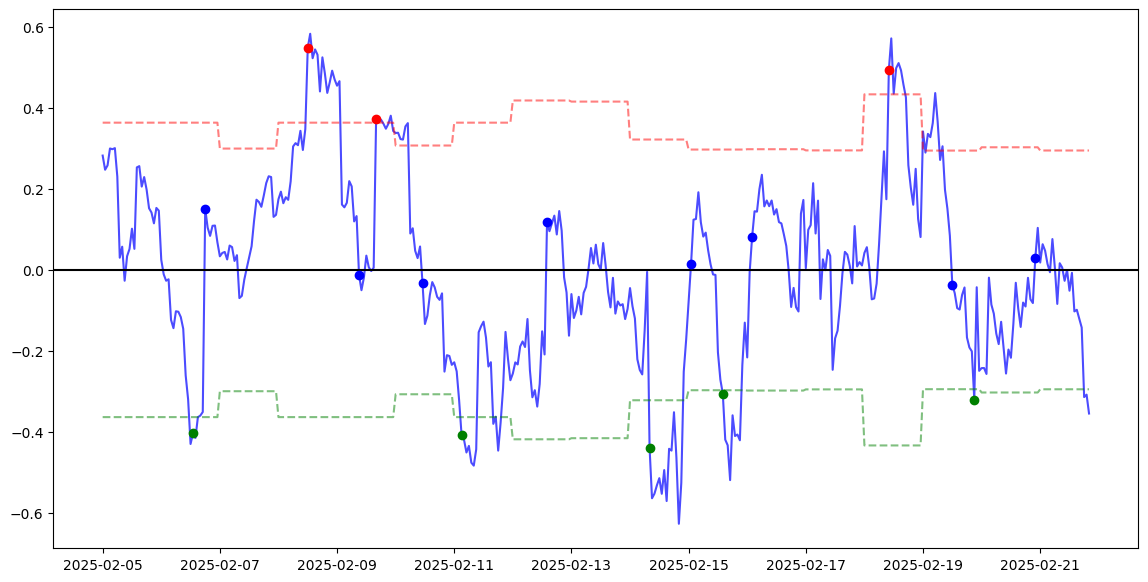

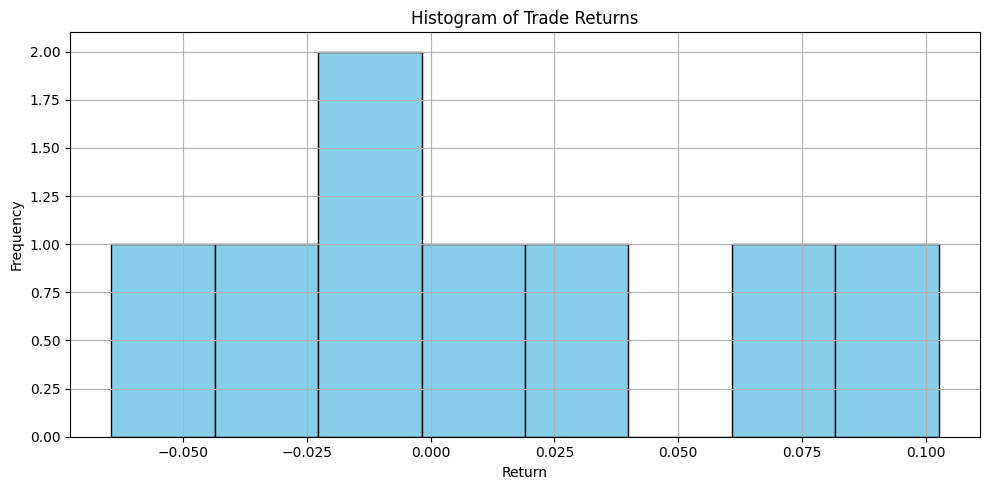

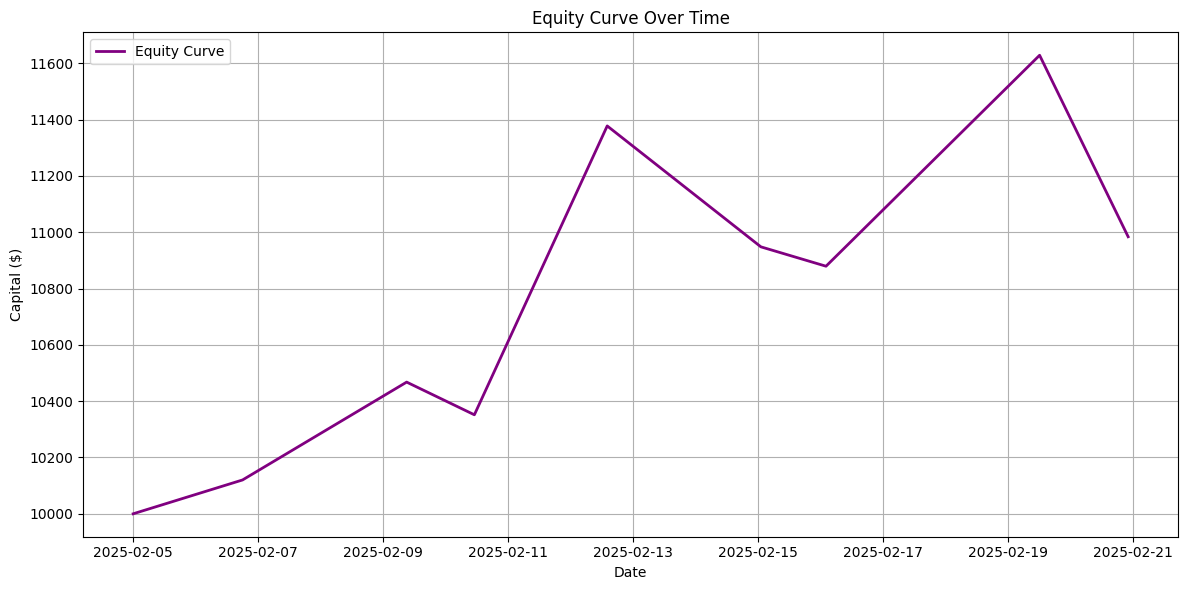

In [21]:

# I define the function to backtest my algorithm
def backtest_mean_reversion(spread, nikkei, vix, initial_capital=10000, news_data=None):

  # I reset the index to make sure they are all aligned
    spread = spread.reset_index(drop=True)
    nikkei = nikkei.reset_index(drop=True)
    vix = vix.reset_index(drop=True)


    #here I definde the index of the spread and the frequency, in my case hourly
    if not hasattr(spread, 'index') or not isinstance(spread.index, pd.DatetimeIndex):
        spread.index = pd.date_range(start="2025-02-05", periods=len(spread),freq = 'H')
        print(spread.shape)

    # I define the variables to calculate the barriers and the risk taken per trade
    multiplier = 1.5
    risk_per_trade = 0.25
    mean_spread = spread.mean()
    std_spread = spread.std()


    # Now I initialize all the variables used in my algorithm
    trade = None
    entry_price = entry_nikkei = entry_vix = entry_date = None
    capital = available_capital = initial_capital
    trades = []
    barrier_history = []

    upper_bound = None
    lower_b = None
    previous_date = None


    #This is the code used to define the barriers on a daily bases, i iterate over the values of the spread
    # and I calculate the barriers using the sentiment for each day of data

    for i in range(len(spread)):
        current_date = spread.index[i]
        current_spread = spread.iloc[i]
        current_nikkei = nikkei.iloc[i]
        current_vix = vix.iloc[i]

        # I definde the values of the sentiment, and if the day has no news I give it a sentiment score of 0
        if current_date.date() != previous_date:
            sentiment_info = news_data.get(current_date, {'sentiment': 'neutral', 'sentiment_score': 0})
            sentiment_score = sentiment_info['sentiment_score']
            if sentiment_info['sentiment'] == 'negative':
                sentiment_score *= -1
            if sentiment_info['sentiment'] == 'neutral':
                sentiment_score = 0


            # Here I performe the calculation of the barriers
            sentiment_adjustment = 1 - (0.2 * sentiment_score)
            upper_bound = mean_spread + multiplier * std_spread * sentiment_adjustment
            lower_bound = mean_spread - multiplier * std_spread * sentiment_adjustment

            # This line updates the previous date to the current date
            previous_date = current_date.date()


        # Lastly for the barriers I append the values so I can get a better understanding
        barrier_history.append({
            'date': current_date,
            'spread': current_spread,
            'upper': upper_bound,
            'lower': lower_bound,
            'mean': mean_spread,
            'sentiment': sentiment_score
        })


        #THIS IS THE CODE USED FOR THE TRADING MODEL


        # First I define the trading idea for exiting a trade
        if trade in ["Long", "Short"]:
          #This is the condition to exit the trade, if we are in a trade we check for the spread to revert to the mean
            is_exit = (trade == "Long" and current_spread >= mean_spread) or \
                      (trade == "Short" and current_spread <= mean_spread)


            # Here I calculate the return value for the nikkei and the vix after exiting a trade, I also calculate the total captial change
            if is_exit:
                nikkei_return = ((entry_nikkei - current_nikkei) if trade == "Long" else (current_nikkei - entry_nikkei)) / entry_nikkei
                vix_return = ((current_vix - entry_vix) if trade == "Long" else (entry_vix - current_vix)) / entry_vix
                trade_return = (nikkei_return + vix_return) / 2
                capital_change = position_size * trade_return
                capital += capital_change
                available_capital += position_size + capital_change


                # Here I append the values of the trades for further understanding
                trades.append({
                    'type': trade,
                    'entry_date': entry_date,
                    'exit_date': current_date,
                    'entry_spread': entry_price,
                    'exit_spread': current_spread,
                    'nikkei_entry': entry_nikkei,
                    'vix_entry': entry_vix,
                    'nikkei_exit': current_nikkei,
                    'vix_exit': current_vix,
                    'return': trade_return,
                    'capital': capital,
                    'sentiment': sentiment_score,
                    'sentiment info' : sentiment_info['sentiment'],
                    'news': news_data.get(entry_date, {}).get('title', 'No news')
                })

                print(f"\n\u27a1 Exit {trade} on {current_date.date()} | Return: {trade_return*100:.2f}% | Capital: ${capital:.2f}")
                trade = None


        #This is the code used to enter trades based on the spread

        #First I check if the captial is sufficient
        elif available_capital >= initial_capital * risk_per_trade:
            position_size = initial_capital * risk_per_trade
            arima_entry = False

            # I definde the two circunstances where the model can enter a trade
            if current_spread > upper_bound:
                signal = "Short"
                condition = "Predicted < Current"
                expected_move = "mean reversion downward"

            elif current_spread < lower_bound:
                signal = "Long"
                condition = "Predicted > Current"
                expected_move = "mean reversion upward"
            else:
                continue

            try:
              #I define the ARIMA model discussed previously
                model = ARIMA(spread.iloc[:i+1], order=(2, 0, 2))
                model_fit = model.fit()
                predicted = model_fit.forecast()[0]


                #This code is used to confirm the entry of the trade with the ARIMA model if a previous singal was given
                if (signal == "Long" and predicted > current_spread) or (signal == "Short" and predicted < current_spread):
                    trade = signal
                    entry_price = current_spread
                    entry_nikkei = current_nikkei
                    entry_vix = current_vix
                    entry_date = current_date
                    available_capital -= position_size


                    print(f"Opportunity on {current_date.date()} | Forecast: {predicted:.4f} ({condition}) -> Expecting {expected_move} CurrentSpread: {current_spread:.4f} | Sentiment Score: {sentiment_score:.2f} | Sentiment : {sentiment_info['sentiment']} ")
                    print(f"Position: ${position_size:.2f}")

                else:
                    print(f"ARIMA: Waiting for confirmation - {signal} not confirmed")
            except Exception as e:
                print(f"ARIMA Error on {current_date}: {e}")


    # Lastly I calculate the returs of the algorithm as well as the win rate and the average return
    total_return = (capital / initial_capital - 1) * 100
    num_trades = len(trades)
    win_rate = np.mean([t['return'] > 0 for t in trades]) * 100 if trades else 0
    avg_return = np.mean([t['return'] for t in trades]) * 100 if trades else 0
    returns = [t['return'] for t in trades]
    sharpe_ratio = (np.mean(returns) / np.std(returns)) * np.sqrt(252) if len(returns) > 1 and np.std(returns) != 0 else np.nan
    equity_curve = [initial_capital]
    current_capital = initial_capital

    print("\n=== Backtest Summary ===")
    print(f"Initial Capital: ${initial_capital:.2f}")
    print(f"Final Capital: ${capital:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Trades Executed: {num_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Avg Return/Trade: {avg_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



    # For a better understanding I also plot the entries on the graph of the spread, this allowes me to better understand the algorithm.
    barrier_df = pd.DataFrame(barrier_history).set_index('date')
    plt.figure(figsize=(14, 7))
    plt.plot(barrier_df.index, barrier_df['spread'], label='Spread', color='blue', alpha=0.7)
    plt.plot(barrier_df.index, barrier_df['upper'], '--', label='Upper Barrier', color='red', alpha=0.5)
    plt.plot(barrier_df.index, barrier_df['lower'], '--', label='Lower Barrier', color='green', alpha=0.5)
    plt.axhline(y=mean_spread, color='black', linestyle='-', label='Mean')

    for t in trades:
        #This is to plot the entries of the algorithm
        plt.plot(t['entry_date'], spread.loc[t['entry_date']],
             marker='o', color='green' if t['type'] == 'Long' else 'red')

        plt.plot(t['exit_date'], spread.loc[t['exit_date']],
             marker='o', color='blue')

        #This is for the calculation of the equity curve
        current_capital += t['return'] * initial_capital
        equity_curve.append(current_capital)

        trade_dates = [t['exit_date'] for t in trades]
        trade_dates = [spread.index[0]] + trade_dates  # to start from the beginning

    plt.figure(figsize=(10, 5))
    plt.hist(returns, bins=8, color='skyblue', edgecolor='black')
    plt.title("Histogram of Trade Returns")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #This is the plot of the Equity curve
    plt.figure(figsize=(12, 6))
    plt.plot(trade_dates, equity_curve, label='Equity Curve', color='purple', linewidth=2)
    plt.title("Equity Curve Over Time")
    plt.xlabel("Date")
    plt.ylabel("Capital ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        'capital': capital,
        'trades': pd.DataFrame(trades),
        'total_return': total_return,
        'num_trades': num_trades,
        'win_rate': win_rate,
        'avg_return': avg_return,
        'barrier_history': barrier_df
    }


# Calling the funciton with the values I desire, this allows me to also use different assets and different capital allocation to compare.
results = backtest_mean_reversion(
    spread=spread ,
    nikkei=TradedValues['NKD=F'],
    vix=TradedValues['^VIX'],
    initial_capital=10000,
    news_data=sentiment_map
)


Finally we can see the results of the model, We can see that during the backtested period  the model performed quite well, offering a profitable month and a half. There are still some things that need to be look at but this model shows promise for real-world implementations.